In [31]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from pandas import read_feather
import ipywidgets as w
from numpy import arange

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## For a drug class, how many unique adverse reactions are reported?

In [32]:
cl = ['atc_1st','atc_2nd','atc_3rd','atc_4th','drug_concept_name']

d = dropdown(cl)
d

Dropdown(layout=Layout(display='flex', width='100%'), options=('atc_1st', 'atc_2nd', 'atc_3rd', 'atc_4th', 'dr…

classes in above chosen drug class

In [33]:
out= 'outcome_concept_name'
grpd = data.groupby([d.label,out])[out].count().sort_values(ascending=False)
grpd.name = 'n'

In [34]:
grpd2 = grpd.groupby(level=d.label)
series = grpd2.count()

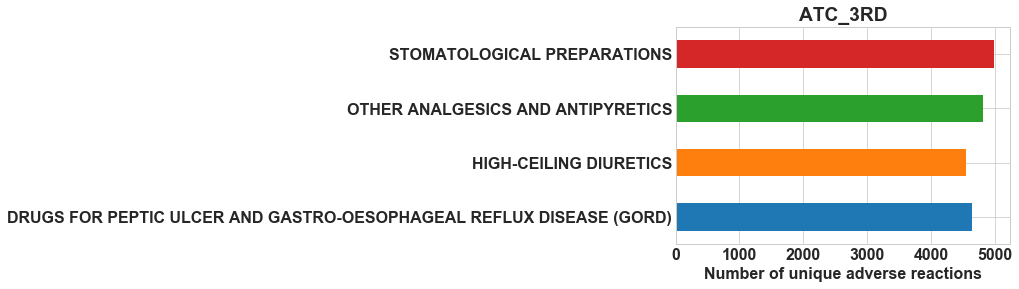

In [35]:
p = plot(series,kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of unique adverse reactions",weight="bold")

## What are the top adverse reactions in the chosen drug class?

In [36]:
ds = dropdown(series.index)
ds

Dropdown(layout=Layout(display='flex', width='100%'), options=('DRUGS FOR PEPTIC ULCER AND GASTRO-OESOPHAGEAL …

In [37]:
i = w.IntSlider(min=1,max=10,step=1,value=5)
i

IntSlider(value=5, max=10, min=1)

indices for most frequent ADRs

In [46]:
sub = data.query('{0} in @ds.label'.format(d.label)).groupby([d.label,out])[out].count().sort_values(ascending=False).head(i.value)
sub.name= "n"
sub = sub.reset_index()

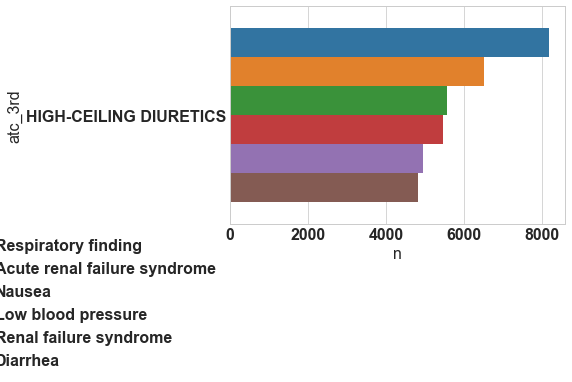

In [47]:
import seaborn as sns
p = sns.barplot(y=d.label,x='n',hue=out,data=sub,orient='h')
p.legend(bbox_to_anchor=(0,0))

## How do the ADRs break down by report year?

In [40]:
outs = sub.iloc[:,1].values
sub2 = data.query('({0}==@ds.label) & ({1} in @outs)'.format(d.label,out))

In [41]:
series2 = freqXbyY(sub2,'report_year','id')

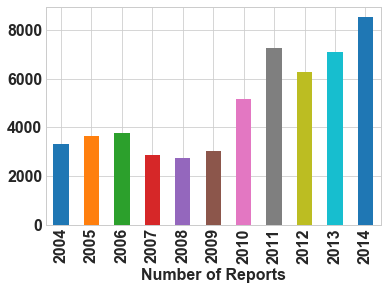

In [42]:
p = plot(series2,kind='bar')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel(p.get_ylabel(),rotation=0)
q = p.set_xlabel("Number of Reports",weight="bold")

## How many are reported within these ADRs across the sexes?

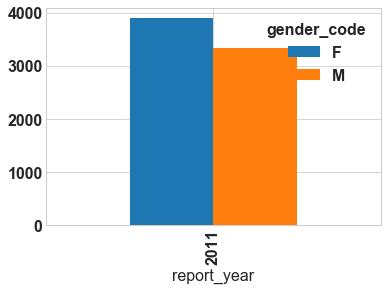

In [48]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'report_year'
count = 'id'
ry = ['2011']

#want to filter dataset for M/F gender and if report year was clicked or selected
if ry is None:
    dat = clean_gender(sub2)
else:
    dat = clean_gender(sub2).query('report_year==@ry')

#main
sub = dat[[bars,x,count]]
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()

## How many are reported within this class across ages?

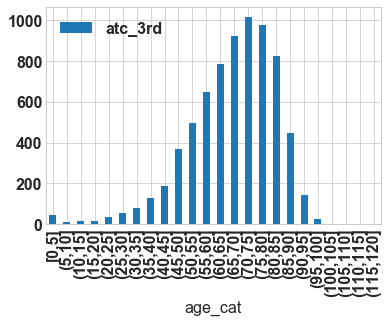

In [49]:
#plot variables for filtering/wrangling
grp = 'age_cat'

#main
dat[[d.label,grp]].groupby([grp]).count().plot.bar()

## How many are reported within this class across ages for each sex?

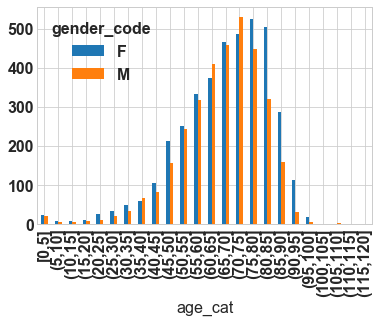

In [51]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'age_cat'
count = 'id'

#want to filter dataset for M/F gender and if report year was clicked or selected
sub = clean_gender(dat)[[bars,x,count]]

#main
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()